In [1]:
import pandas as pd
import numpy as np
import sqlite3
%matplotlib inline
import matplotlib.pyplot as plt
import pygwalker as pyg

In [2]:
%reload_ext sql
%config SqlMagic.displaylimit = 50
%config SqlMagic.displaycon = False

## NYC Eletric Vehicle Charging Stations

* Is there a correlation to the income of inidividuals in the area and the amount of charging stations? (With an assumption that higher income areas have more resources.)
* Why might certain zip codes have more EV charging stations than other?
* As an EV owner, what might be the best place to live in NYC for charging accessibility?

## Data:
## NYC EV Fleet Station Network
* Source: https://catalog.data.gov/dataset/nyc-ev-fleet-station-network
* Metadata Updated: November 15, 2024
* Department of Citywide Administrative Services, DCAS, is rapidly expanding its base of electric chargers to support its electric and plug-in hybrid vehicles. We have installed over 1,600 charging ports across over 1,025 charging stations, including over 180 fast-charging stations, at City garages and parking locations around the city. We have deployed over 80 solar carports that allow EVs to be completely independent from the electrical grid and fossil fuel energy. We have partnered with City schools to provide both solar chargers and EVs to support education programs and adopted other solar powered city equipment.
This list of addresses for EV charging sites is intended for City Vehicle Operators. DCAS provides public access to a selected list of the fleet EV chargers above. Members of the public may charge their EVs at these sites for a nominal charging fee. A list of publicly available chargers can be found here: https://www.nyc.gov/assets/dcas/downloads/pdf/fleet/electric-vehicle-public-charging-rules.pdf. In addition, NYC DOT is rolling out a network of dedicated public access curbside EV charging sites.

## NYC Zip Codes and Median Income Database
* Source: https://datacommons.one.org/tools/download#pt=CensusZipCodeTabulationArea&place=geoId%2F3651000&sv=Median_Income_Household&dtType=LATEST&facets=%7B%7D
* Updated 2022
* The ONE Campaign and Google partnered under a common objective: to get data in the hands of people. Our joint work on ONE Data Commons enables users to harness the power of AI to access and make sense of vast amounts of data on global economic, political, and social topics. All with the aim of ensuring that everyone, everywhere is empowered to challenge the status quo, demand action, and catalyze an end to extreme poverty and preventable disease.
ONE Data Commons is a powerful tool combining the data and research from data.one.org and hundreds of billions of data points on economics, climate, health, demographics and more from Google's Data Commons.
Derived from United States Census Bureau.

In [4]:
evny = pd.read_csv("NYC_EV_Fleet_Station_Network.csv")

In [5]:
evny

,AGENCY,STATION NAME,TYPE OF CHARGER,NO. OF PLUGS,ADDRESS,CITY,POSTCODE,BOROUGH,PUBLIC CHARGER?,FEE FOR CITY DRIVERS,LATITUDE,LONGITUDE,COMMUNITY DISTRICT,COUNCIL DISTRICT,CENSUS TRACT 2020,BIN,BBL,NEIGHBORHOOD TABULATION AREA (NTA) (2020)
0,ACS,NYC FLEET / ACS_LINDEN_1_L3,Level 3 Fast Charger,1,2554 Linden Blvd,East New York,11208.0,Brooklyn,NaN,NaN,40.668034,-73.869949,305.0,42.0,1220.0,3098733.0,3.044840e+09,BK0505
1,ACS,NYC FLEET / ACS_LINDEN_2_L3,Level 3 Fast Charger,1,2554 Linden Blvd,East New York,11208.0,Brooklyn,NaN,NaN,40.668034,-73.869949,305.0,42.0,1220.0,3098733.0,3.044840e+09,BK0505
2,ACS,NYC FLEET / ACS_LINDEN-1,Level 2 Charger,1,2554 Linden Blvd,Brooklyn,11208.0,Brooklyn,NaN,NaN,40.668034,-73.869949,305.0,42.0,1220.0,3098733.0,3.044840e+09,BK0505
3,ACS,NYC FLEET / ACSSTMARKSPL1,Level 2 Charger,1,350 St Marks Pl,Staten Island,10301.0,Staten Island,NaN,NaN,40.640708,-74.077697,501.0,49.0,3.0,5000185.0,5.000160e+09,SI0101
4,CITYHALL,NYC FLEET / CITYHALL EAST,Level 2 Charger,2,New York City Hall,New York,10007.0,Manhattan,NaN,NaN,40.712806,-74.006096,101.0,1.0,31.0,1079147.0,1.001220e+09,MN0102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,DOT,DOT LOT QUEENS BOROUGH HALL L2,DOT Municipal Level 2 Charger,31,80-25 126th Street,Queens,11415.0,Queens,Yes,$0.27 per kWh,40.714856,-73.827050,409.0,29.0,21601.0,4620879.0,4.096570e+09,QN0901
1406,DOT,DOT LOT QUEENS BOROUGH HALL L3,DOT Municipal Level 3 Charger,3,80-25 126th Street,Queens,11415.0,Queens,Yes,$0.39 per kWh,40.714856,-73.827050,409.0,29.0,21601.0,4620879.0,4.096570e+09,QN0901
1407,DOT,DOT LOT QUEENS FAMILY COURT,DOT Municipal Level 2 Charger,3,150-07 Archer Avenue,Queens,11432.0,Queens,Yes,$0.27 per kWh,40.701386,-73.803740,412.0,27.0,240.0,4215602.0,4.100920e+09,QN1201
1408,DOT,DOT LOT QUEENSBORO HALL FIELD,DOT Municipal Level 2 Charger,3,80-25 126th Street,Queens,11415.0,Queens,Yes,$0.27 per kWh,40.714856,-73.827050,409.0,29.0,21601.0,4620879.0,4.096570e+09,QN0901


In [6]:
print(evny.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1410 entries, 0 to 1409
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   AGENCY                                     1410 non-null   object 
 1   STATION NAME                               1410 non-null   object 
 2   TYPE OF CHARGER                            1410 non-null   object 
 3   NO. OF PLUGS                               1410 non-null   int64  
 4   ADDRESS                                    1399 non-null   object 
 5   CITY                                       1399 non-null   object 
 6   POSTCODE                                   1399 non-null   float64
 7   BOROUGH                                    1399 non-null   object 
 8   PUBLIC CHARGER?                            73 non-null     object 
 9   FEE FOR CITY DRIVERS                       71 non-null     object 
 10  LATITUDE                

In [7]:
evny.dropna(subset=["POSTCODE"], inplace=True)
evny["POSTCODE"] = evny["POSTCODE"].astype(int)
print(evny.info())

## Change POSTCODE from float to int to join data in zipcode table.

<class 'pandas.core.frame.DataFrame'>
Index: 1399 entries, 0 to 1409
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   AGENCY                                     1399 non-null   object 
 1   STATION NAME                               1399 non-null   object 
 2   TYPE OF CHARGER                            1399 non-null   object 
 3   NO. OF PLUGS                               1399 non-null   int64  
 4   ADDRESS                                    1399 non-null   object 
 5   CITY                                       1399 non-null   object 
 6   POSTCODE                                   1399 non-null   int64  
 7   BOROUGH                                    1399 non-null   object 
 8   PUBLIC CHARGER?                            73 non-null     object 
 9   FEE FOR CITY DRIVERS                       71 non-null     object 
 10  LATITUDE                     

In [8]:
nyzip = zipcode = pd.read_csv("New York City_CensusZipCodeTabulationArea.csv")
nyzip

## Plan on using placeName (Zip Codes) and Value:Median_Income_Household to join in evny table.

,placeDcid,placeName,Date:Median_Income_Household,Value:Median_Income_Household,Source:Median_Income_Household
0,zip/10001,10001,2022,106509,https://www.census.gov/programs-surveys/acs/da...
1,zip/10002,10002,2022,43362,https://www.census.gov/programs-surveys/acs/da...
2,zip/10003,10003,2022,152863,https://www.census.gov/programs-surveys/acs/da...
3,zip/10004,10004,2022,232543,https://www.census.gov/programs-surveys/acs/da...
4,zip/10005,10005,2022,189886,https://www.census.gov/programs-surveys/acs/da...
...,...,...,...,...,...
175,zip/11691,11691,2022,59153,https://www.census.gov/programs-surveys/acs/da...
176,zip/11692,11692,2022,57687,https://www.census.gov/programs-surveys/acs/da...
177,zip/11693,11693,2022,72714,https://www.census.gov/programs-surveys/acs/da...
178,zip/11694,11694,2022,100190,https://www.census.gov/programs-surveys/acs/da...


In [9]:
print(nyzip.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   placeDcid                       180 non-null    object
 1   placeName                       180 non-null    int64 
 2   Date:Median_Income_Household    180 non-null    int64 
 3   Value:Median_Income_Household   180 non-null    int64 
 4   Source:Median_Income_Household  180 non-null    object
dtypes: int64(3), object(2)
memory usage: 7.2+ KB
None


In [10]:
extracted_nyzip = nyzip.loc[:, ["placeName", "Value:Median_Income_Household"]]
print (extracted_nyzip)

## Extracting only placeName (zip code) and Value: Median_Income_Household (Median Income).

     placeName  Value:Median_Income_Household
0        10001                         106509
1        10002                          43362
2        10003                         152863
3        10004                         232543
4        10005                         189886
..         ...                            ...
175      11691                          59153
176      11692                          57687
177      11693                          72714
178      11694                         100190
179      11697                         134563

[180 rows x 2 columns]


In [11]:
extracted_nyzip.to_csv("extracted_nyzip", index = False)

## Saving this information to replace the orginal nyzip csv file.

In [12]:
conn = sqlite3.connect("merge.db")
evny.to_sql("evny", conn, if_exists = "replace", index = False)
extracted_nyzip.to_sql("extracted_nyzip", conn, if_exists = "replace", index = False)
conn.close()
%sql sqlite:///merge.db

## Merge evny and extracted_nyzip into db to perform sqlite.

Connecting to 'sqlite:///merge.db'

In [13]:
%sqlcmd tables

Name
evny
extracted_nyzip
postcode_plugs


In [14]:
%sqlcmd columns -t evny

name,type,nullable,default,primary_key
AGENCY,TEXT,True,None,0
STATION NAME,TEXT,True,None,0
TYPE OF CHARGER,TEXT,True,None,0
NO. OF PLUGS,INTEGER,True,None,0
ADDRESS,TEXT,True,None,0
CITY,TEXT,True,None,0
POSTCODE,INTEGER,True,None,0
BOROUGH,TEXT,True,None,0
PUBLIC CHARGER?,TEXT,True,None,0
FEE FOR CITY DRIVERS,TEXT,True,None,0


In [15]:
%sqlcmd columns -t extracted_nyzip

name,type,nullable,default,primary_key
placeName,INTEGER,True,None,0
Value:Median_Income_Household,INTEGER,True,None,0


In [20]:
%%sql
SELECT "STATION NAME", "NO. OF PLUGS", "POSTCODE"
FROM evny
ORDER BY POSTCODE

STATION NAME,NO. OF PLUGS,POSTCODE
NYC FLEET / DPR_CHELSEAPARK,2,10001
NYC FLEET / DSNY_MBS-1,1,10001
NYC FLEET / DSNY_MBS-DCFC1,1,10001
NYC FLEET / DSNY_MBS-DCFC2,1,10001
NYC FLEET / DSNY_MBS-DCFC3,1,10001
NYC FLEET / DSNY_MBS-DCFC4,1,10001
NYC FLEET / DSNY_MBS-DCFC5,1,10001
NYC FLEET / DSNY_MBS-DCFC6,1,10001
NYC FLEET / DSNY_MBS-DCFC7,1,10001
NYC FLEET / DSNY_SPARE,1,10001


In [81]:
## Extracting the number of plugs to each POSTCODE (zip code) and want to order this information by the POSTCODE (zip code).

In [21]:
%%sql
CREATE TABLE postcode_plugs AS
SELECT postcode, SUM("No. OF PLUGS") AS total_plugs
FROM evny
GROUP BY postcode;

RuntimeError: (sqlite3.OperationalError) table postcode_plugs already exists
[SQL: CREATE TABLE postcode_plugs AS
SELECT postcode, SUM("No. OF PLUGS") AS total_plugs
FROM evny
GROUP BY postcode;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)
If you need help solving this issue, send us a message: https://ploomber.io/community


In [ ]:
## Reran code, so table is already created.

In [18]:
%sql SELECT * FROM postcode_plugs;

## Create table to match the zip codes and total number of plugs at each zip code. Will tie this information to the zip codes median incomes.

POSTCODE,total_plugs
10001,36
10002,44
10003,2
10004,2
10005,4
10007,11
10009,6
10010,2
10013,12
10014,4


In [22]:
%%sql
select *
FROM postcode_plugs
JOIN extracted_nyzip ON placeName = POSTCODE
WHERE total_plugs >= 50
ORDER BY total_plugs DESC

POSTCODE,total_plugs,placeName,Value:Median_Income_Household
10035,126,10035,36989
11101,107,11101,109625
11368,106,11368,69391
11377,86,11377,72273
11370,59,11370,71618
10314,57,10314,103436
11415,53,11415,88306
11354,50,11354,56854


## Zip Codes
* 10035 = Randalls Island
* 11101 = Long Island City, Queens, NY
* 11368 = Corona, Queens, NY
* 11377 = Woodside, Queens, NY
* 11370 = East Elmhurst, Queens, NY
* 10314 = Staten Island: Travis - Chelsea + Bulls Head + Mid Island + Manor Heights + Westerleigh, Castleton Corners
* 11415 = Kew Gardens, Queens, NY
* 11354 = Flushing, Queens, NY

In [23]:
%%sql
select *
FROM postcode_plugs
JOIN extracted_nyzip ON placeName = POSTCODE
WHERE "Value:Median_Income_Household" >= 150000
ORDER BY "Value:Median_Income_Household" DESC

POSTCODE,total_plugs,placeName,Value:Median_Income_Household
10007,11,10007,250001
10004,2,10004,232543
10005,4,10005,189886
11215,45,11215,173899
10024,4,10024,166994
11201,42,11201,163310
10022,2,10022,161236
10028,2,10028,160244
10065,8,10065,158276
10003,2,10003,152863


## Zip Codes
* 10007 = Lower Manhattan (FiDi), New York, NY
* 10004 = Bowling Green, New York, NY
* 10005 = South Street Seaport, New York, NY
* 11215 = Park Slope, Brooklyn, NY
* 10024 = Upper West Side, New York, NY
* 11201 = Downtown Brooklyn, Brooklyn, NY
* 10022 = Upper East Side (Close to MoMA), New York, NY
* 10028 = Yorkville, New York, NY

## Conclusion
* If you have an electric vehicle, it would be best to live or visit Queens to have the most accessibility to charging stations.
* Higher income households live in Manhattan but charging stations are limited with many being in the single digits.
* Exception of Park Slope and Downtown Brooklyn having both high income households and a sizeable amount of charging stations.

In [24]:
merged = pd.concat([evny, extracted_nyzip], join = "outer", axis = 1)
print(merged)

        AGENCY                    STATION NAME                TYPE OF CHARGER  \
0          ACS     NYC FLEET / ACS_LINDEN_1_L3           Level 3 Fast Charger   
1          ACS     NYC FLEET / ACS_LINDEN_2_L3           Level 3 Fast Charger   
2          ACS        NYC FLEET / ACS_LINDEN-1                Level 2 Charger   
3          ACS       NYC FLEET / ACSSTMARKSPL1                Level 2 Charger   
4     CITYHALL       NYC FLEET / CITYHALL EAST                Level 2 Charger   
...        ...                             ...                            ...   
1405       DOT  DOT LOT QUEENS BOROUGH HALL L2  DOT Municipal Level 2 Charger   
1406       DOT  DOT LOT QUEENS BOROUGH HALL L3  DOT Municipal Level 3 Charger   
1407       DOT     DOT LOT QUEENS FAMILY COURT  DOT Municipal Level 2 Charger   
1408       DOT   DOT LOT QUEENSBORO HALL FIELD  DOT Municipal Level 2 Charger   
1409       DOT               DOT LOT ST GEORGE  DOT Municipal Level 2 Charger   

      NO. OF PLUGS         

In [25]:
pyg.walk(merged)

Box(children=(HTML(value='\n<div id="ifr-pyg-000628519e9e807dho2Dm5BCeJjLzTVp" style="height: auto">\n    <hea…

* Latitude and longitude information from NYC EV data.
* Size of the dots dependent on the median household income. Bigger the dot, higher the median household income.
* Tried to do the opacity based on the number of plugs for the area but the dots is plotting each charging location.

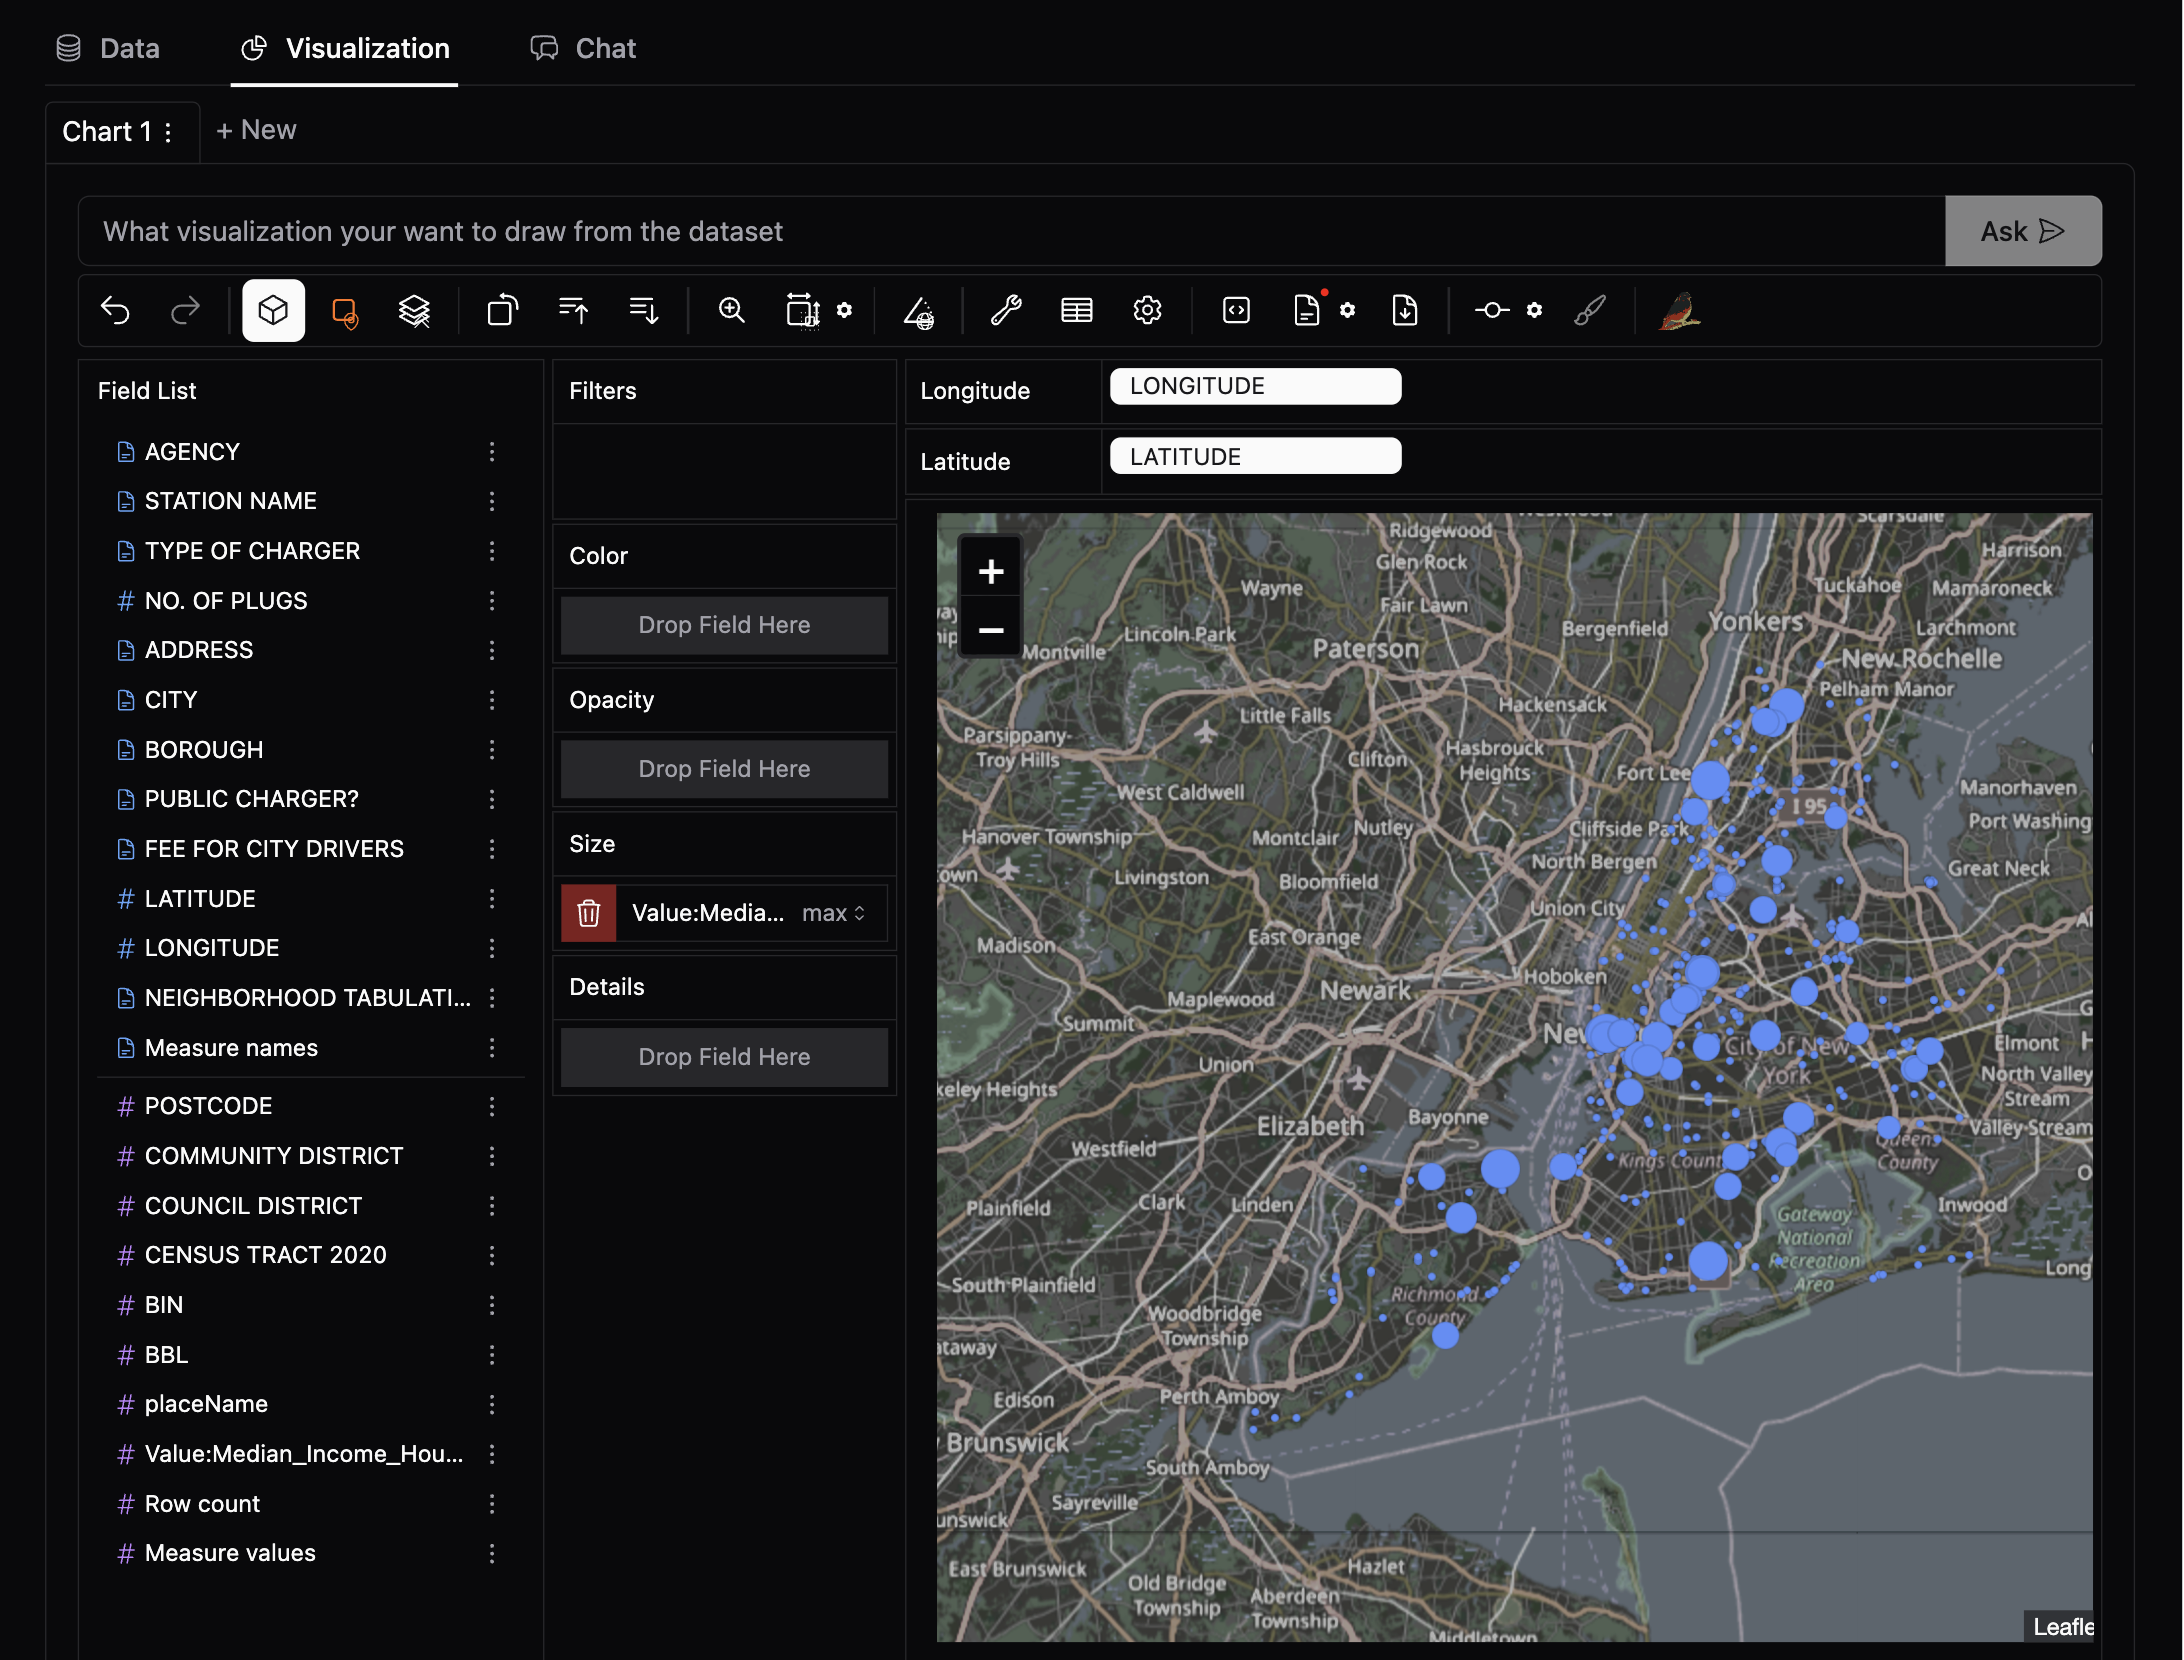

In [26]:
from IPython.display import Image
Image(filename='Screenshot 2024-12-02 at 7.19.41 PM.png')